# 01 Importing Libraries

In [98]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing dataframes

In [100]:
# Importing customer dataframe
path = r'C:\Users\vacgo\Documents\Achievement 4\Instacart Basket Analysis'
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_20241118.pkl'))

In [101]:
print(orders_products_all.columns)

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_from_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_2', 'price_range_loc',
       'busiest_day', 'busiest_days_new', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'ave_spent', 'spender', 'median_days_to_order',
       'frequent_cust', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income'],
      dtype='object')


In [102]:
#orders_products_all.isnull().sum()

# 03 Creating Visualizations

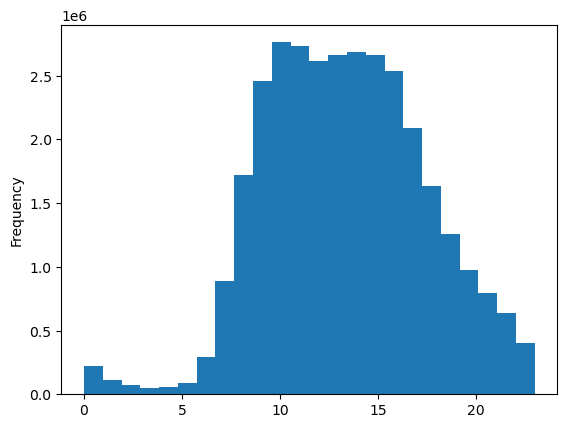

In [104]:
# Histogram of orders_hour_of_day

hist = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram is telling us how many orders are happening per hour of the day. In this case, we can see that the most number of orders are happening around late morning to early afternoon, (around 9am to 4pm). Most customers are using Instacart during those peak hours.

In [106]:
#Save histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

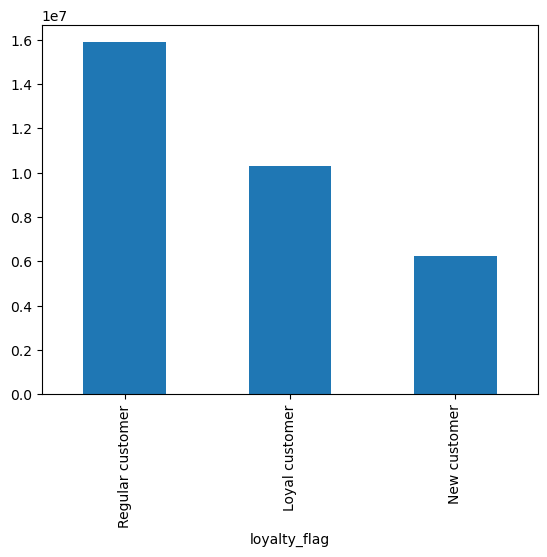

In [107]:
# Creating plot for loyalty_flag
bar = orders_products_all['loyalty_flag'].value_counts().plot.bar()

In [108]:
#Save bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [109]:
# Creating subset of 70/30 percent for line chart
np.random.seed(4)
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [110]:
# assigning the rows into big and small (tilde negates)
big = orders_products_all[dev]
small = orders_products_all[~dev]

In [111]:
# Check if the dataframe and subsets have the same len

len(orders_products_all)

32404859

In [112]:
len(big) + len(small)

32404859

In [140]:
# Only get the columns needed for the line chart
df_2 = big[['order_hour_of_day', 'prices']]

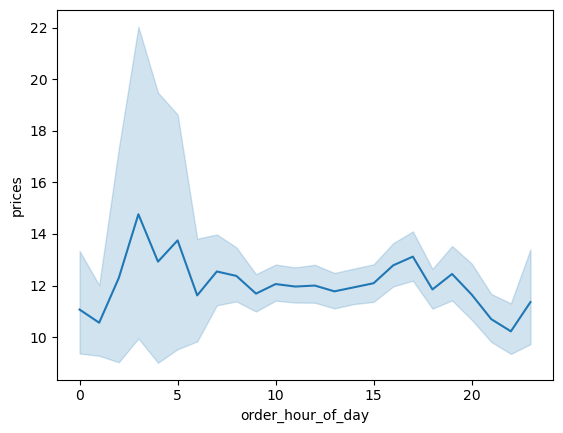

In [142]:
line = sns.lineplot(data = df_2, x='order_hour_of_day', y = 'prices')

In [143]:
# Exporting linechart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_order_hour_vs_price_small.png'))

In [144]:
# Create a line chart to see connection of age and dependants
df_3 = small [['age','dependants']]

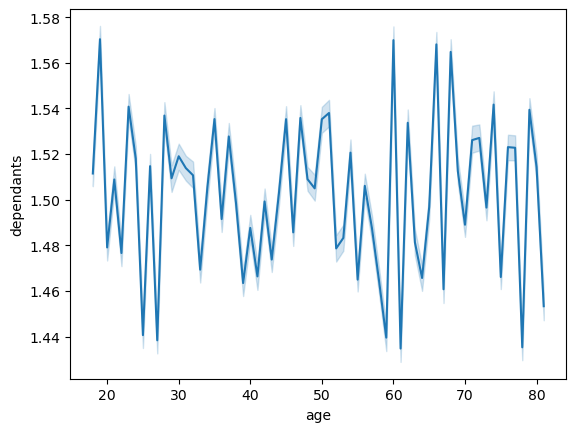

In [145]:
line_2 = sns.lineplot(data = df_3, x='age', y = 'dependants')

#### It seems that there is no clear relationship between age and number of dependents

In [151]:
df_3.describe()

,age,dependants
count,9.721098e+06,9.721098e+06
mean,4.946331e+01,1.501987e+00
std,1.848238e+01,1.118700e+00
min,1.800000e+01,0.000000e+00
25%,3.300000e+01,1.000000e+00
50%,4.900000e+01,2.000000e+00
75%,6.500000e+01,3.000000e+00
max,8.100000e+01,3.000000e+00


In [157]:
# Exporting linechart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_age_vs_dependant.png'))

In [153]:
# Create scatterplot for age vs income
df_4 = small [['age','income']]

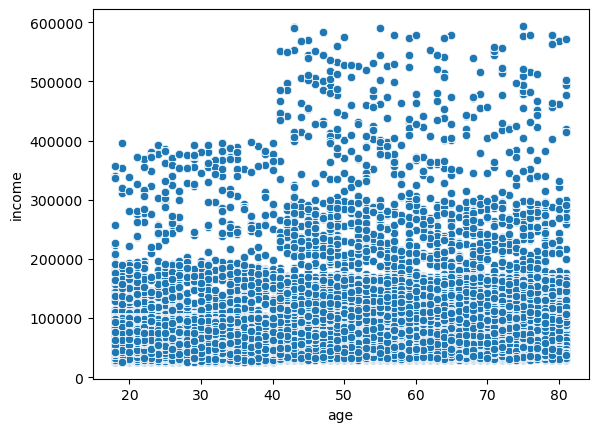

In [155]:
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = df_4)

#### It shows the income distribution per age. As we can see that there is a huge jump in the number of people who earns quite a lot from the age 40 and above. We can also see that people with 200000 and below makes up the majority of the customers across the all age.

In [159]:
#Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))